# Assignment activity 1 

Determine the optimal price at which they should sell Lego products based on the number of Lego pieces in the Lego set and the age of the customer that the product is most likely to be purchased by. 

### - What price should be set for the Lego sets with 8000 Lego pieces? (Simple linear regression)

#### <span style="color:green"> 782.84  </span>

### - What price should be set for the Lego sets with 8000 Lego pieces that are most likely to be purchased by 30-year-old customers? (Multiple linear regression)

#### <span style="color:green">  253.31  </span>

In [1]:
#Import all the necessary packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

/Users/mohabarikbin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import CSV file and view top five rows
lego = pd.read_csv("lego.csv")

lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [3]:
# describe data: exploratory stats 
lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [72]:
# describe data: data types, and dimensions
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [5]:
# find missing value 
lego.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

In [6]:
# view the minimum and maximum values for each column 
print(lego.min())
print(lego.max())

ages                 0.0000
list_price           2.2724
num_reviews          0.0000
piece_count          1.0000
play_star_rating     0.0000
review_difficulty    0.0000
country              0.0000
dtype: float64
ages                   30.00
list_price           1104.87
num_reviews           367.00
piece_count          7541.00
play_star_rating        5.00
review_difficulty       5.00
country                20.00
dtype: float64


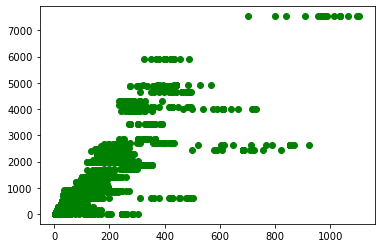

In [73]:
# prelimenary visuals: What does the trend tell you about product pricing?
x = lego['list_price']
y= lego['piece_count']
plt.scatter(x, y, color='green')

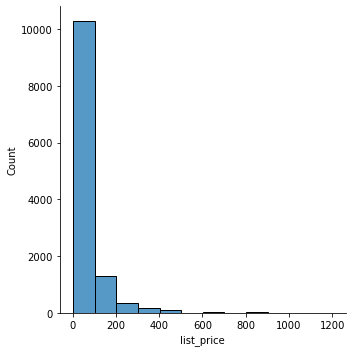

In [8]:
# display the distrobution of lego pricing 
# note that data is heavily skewed 
sns.displot(lego, x='list_price', binwidth=100)

## simple linear regression 

Set “piece count” as my independent (explanatory) variable and “price” as dependent variable. For my multiple regression analysis I added a third variable, “age” as an independent variable. 


In [60]:
# set independant and dependant variables

# dependant variable 
y = lego["list_price"].values.reshape(-1, 1)

# indepenant variable 
X = lego[["piece_count"]].values.reshape(-1, 1)

I split the dataset into training (70%) and test (30%) sets in order to train my model using the train_test_split module from sklearn. 
this enables to prevent overfitting and 
 you want the training set to be as large as possible while leaving enough data in the test set to be done properly. 

In [61]:
# split the data into training = 0.7 and testing = 0.3 subsets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=5)

Create a regression model, fit the model and draw a prediction estimate for the training set. Calculate r_squared, intercept and coefficient values. 

In [62]:
# run a simple Linear Regression 
lm = LinearRegression()
lm.fit(X_train, y_train) # fit the model
y_pred = lm.predict(X_train) # call prediction
y_pred

array([[104.93919847],
       [ 38.73625412],
       [ 25.24692586],
       ...,
       [ 28.49967168],
       [ 26.4906228 ],
       [ 44.85906978]])

In [69]:
print("R_squared:", lm.score(X_train,y_train))
print("Intercept:", lm.intercept_)
print("Coefficients:")
list(zip(X_train, lm.coef_)) # map a similiar index of multiple containers 

R_squared: 0.768190957297132
Intercept: [17.49773729]
Coefficients:


[(array([914]), array([0.09566899]))]

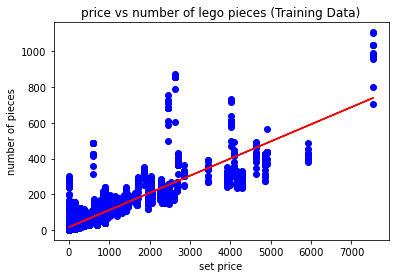

In [64]:
# plot the training set  
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred, color='red')

plt.title("price vs number of lego pieces (Training Data)")
plt.xlabel("set price")
plt.ylabel("number of pieces")

plt.show()

In [74]:
# calcualte the r2 value 
print(lm.score(X_train, y_train))

0.768190957297132
0.7330385068354661



### What price should be set for the Lego sets that have 8,000 Lego pieces?

782.84 

In [76]:
predicted_8k = lm.predict([[8000]])  
predicted_8k

array([[782.84969507]])

## Multiple linear regression

In [40]:
# dependant variable 
yy = lego["list_price"] 
#independant variable 
xx = lego[["piece_count", "ages"]] 

In [41]:
# create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3, random_state=5)

In [53]:
# Run a Multiple Linear Regression
multi = LinearRegression()

# fit the model 
multi.fit(x_train, y_train)

LinearRegression()

In [54]:
 # call the prediction  
multi.predict(x_train)

array([105.31946916,  38.79803594,  25.21506289, ...,  28.52852519,
        26.36951271,  44.92267922])

In [55]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x_train, multi.coef_))

R-squared:  0.7681985466459664
Intercept:  16.985596749203417
Coefficients:


[('piece_count', 0.09569755116044504), ('ages', 0.02987278094702156)]

After fitting the model to the train datset I will evaluate the performance of the model using the test data. I predict the test data and compare the predictions with actual test values.

In [77]:
## Test the accuracy of the linear model by running the regression model for the test set. 

# Linear regression; fitting the model.
multi.fit(x_test,y_test) 

# Predict the test set values.
y_pred = multi.predict(x_test) 

y_pred 

# Print R-squared value of the test data.
print(multi.score(x_test,y_test)) 


# the output here is very close to the r2 of the training set (0.768190957297132) which allows me to conclude my is acurate. 

0.7344069243325273


 
### What price should be set for the Lego sets with 8000 Lego pieces that are most likely to be purchased by 30-year-old customers? 
 253.31

In [78]:
# make predictions
v1 = 30
v2 = 8000
print ('Predicted Value: \n', multi.predict([[v1 ,v2]]))  

Predicted Value: 
 [[253.3184827]]


/Users/mohabarikbin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
